In [112]:
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import numpy as np

importieren der Reden und anwenden der Lemmata

In [113]:
def laden_alleReden():
    
    with open('C:/Users/ck12/Documents/Fächer/Semester 7/Polarisierung im Bundestag/Test Jupyter/speeches_preprocessed.json', 'r') as fp:
        data = json.load(fp)
    return data.copy()

In [114]:
alleReden = laden_alleReden()

Reden nach Parteien sortieren und zu Parteitexten zusammenfügen

In [115]:
reden_gefiltert = {'CDU/CSU':[],
                   'SPD':[],
                   'AfD':[],
                   'FDP':[],
                   'BÜNDNIS 90/DIE GRÜNEN':[],
                   'DIE LINKE':[],
                   'fraktionslos':[],
                   'Bremen':[]
                  }
for rede in alleReden:
    rede['party']=rede['party'].replace(u'\xa0', u' ')
    if rede['party']=='Bündnis 90/Die Grünen':
        rede['party']='BÜNDNIS 90/DIE GRÜNEN'
    if rede['party']=='Fraktionslos':
        rede['party']='fraktionslos'
    
    reden_gefiltert[ rede['party'] ].extend(rede['text_lem'])

Methode zum Erstellen von unique words von Einzelparteien und Parteipaaren

In [116]:
def return_unique_words(partylist,word_dict):

    andereworte = set()
    parteienworte = set()
    for key in word_dict.keys():
        if key not in partylist:
            andereworte = andereworte | set(word_dict[key])
        else:
            parteienworte = parteienworte | set(word_dict[key])
    
    #andereworte = set(andereworte)
    #parteienworte = set(parteienworte)
    

    unique_words = parteienworte - andereworte
    
    return unique_words

unique words Einzelpartei. Nachfolgend weiter bei Wordcounterliste für Einzelpartei

In [124]:
unique_words = return_unique_words(['SPD'],reden_gefiltert)

shared unique words eines Parteipaares

In [62]:
unique_words = return_unique_words(['AfD','FDP'],reden_gefiltert) - return_unique_words(['AfD'],reden_gefiltert) - return_unique_words(['FDP'],reden_gefiltert)

In [63]:
len(unique_words)

1300

unique words nach Parteien in Form von keys sortiert

In [69]:
uw_all = {'SPD': return_unique_words('SPD',reden_gefiltert),
'FDP': return_unique_words('FDP',reden_gefiltert),
'CDU/CSU': return_unique_words('CDU/CSU',reden_gefiltert),
'DIE LINKE': return_unique_words('DIE LINKE',reden_gefiltert),
'BÜNDNIS 90/DIE GRÜNEN': return_unique_words('BÜNDNIS 90/DIE GRÜNEN',reden_gefiltert),
'AfD': return_unique_words('AfD',reden_gefiltert)
}

unique words von Parteipaaren

In [130]:
rows, cols = (len(uw_all), len(uw_all))
suw = [[0 for i in range(cols)] for j in range(rows)]
suw_words = [[0 for i in range(cols)] for j in range(rows)]
for ix,p1 in enumerate(uw_all.keys()):
    for jx,p2 in enumerate(uw_all.keys()):
        if jx > ix:
            print(p1,p2)
            tmp = return_unique_words([p1,p2],reden_gefiltert) - return_unique_words(p1,reden_gefiltert) - return_unique_words(p2,reden_gefiltert)
            suw_words[ix][jx] = tmp
            suw[ix][jx] = len(tmp)
            suw[jx][ix] = suw[ix][jx]
print(suw)
#0 SPD, 1 FDP, 2 CDU/CSU, 3 Linke, 4 Grüne, 5 AfD

SPD FDP
SPD CDU/CSU
SPD DIE LINKE
SPD BÜNDNIS 90/DIE GRÜNEN
SPD AfD
FDP CDU/CSU
FDP DIE LINKE
FDP BÜNDNIS 90/DIE GRÜNEN
FDP AfD
CDU/CSU DIE LINKE
CDU/CSU BÜNDNIS 90/DIE GRÜNEN
CDU/CSU AfD
DIE LINKE BÜNDNIS 90/DIE GRÜNEN
DIE LINKE AfD
BÜNDNIS 90/DIE GRÜNEN AfD
[[0, 1223, 5863, 1460, 1408, 2089], [1223, 0, 2627, 645, 661, 1300], [5863, 2627, 0, 2067, 2251, 4209], [1460, 645, 2067, 0, 899, 1319], [1408, 661, 2251, 899, 0, 1053], [2089, 1300, 4209, 1319, 1053, 0]]


In [132]:
print(uw_all.keys())
print(suw_words[0][1])
suw

dict_keys(['SPD', 'FDP', 'CDU/CSU', 'DIE LINKE', 'BÜNDNIS 90/DIE GRÜNEN', 'AfD'])
{'Liberalem', 'Wahlpause', 'Nichtverbreitungsregimes', 'Rüstungsbeschaffung', 'standortsichernden', 'Gesamteindruck', 'Sollregelung', 'PKGr-Reform', 'Wahlverfahrens', 'Mining', 'UNIFIL-Einsatzes', 'kundenorientiert', 'Xavier', 'Favorit', 'megakompliziert', 'Mietbelastung', '27-Jährige', 'Bundeskartellamts', 'aufflackern', 'Oppositionspolitikerin', 'Automobilwerk', 'Helmut-Schmidt-Universität', 'Soziallasten', 'Berühmtheit', 'belebend', 'Spezialisierungen', 'daruntersetzen', 'angstmachende', 'Gohl', 'Jugendarbeitsschutzgesetz', 'Ermittelnde', 'Subsahara-Afrikas', 'Aufeinandertreffen', 'Patentrechten', 'Kontinuum', 'Einlegen', 'Beratervertrag', 'Sozialwirtschaft', 'AMISOM-Mission', 'Facharbeiters', 'Fox', 'auseinanderfallende', 'Übergangsphasen', '1325.', 'Antiterrordatei', 'Rechtsverhältnisse', 'Rentenversicherungsträgern', 'Datenminimierung', 'Finanzierungsvorschlägen', 'Klärschlamm', 'abwägend', 'untendr

[[0, 1223, 5863, 1460, 1408, 2089],
 [1223, 0, 2627, 645, 661, 1300],
 [5863, 2627, 0, 2067, 2251, 4209],
 [1460, 645, 2067, 0, 899, 1319],
 [1408, 661, 2251, 899, 0, 1053],
 [2089, 1300, 4209, 1319, 1053, 0]]

Wordcounterliste für Einzelpartei

In [125]:
uw_counter = [wort for wort in reden_gefiltert['SPD'] if wort in unique_words]

Wordcounterliste für Parteipaar

In [133]:
uw_counter = [wort for wort in reden_gefiltert['SPD'] + reden_gefiltert['FDP'] if wort in suw_words[0][1]]

Counter

In [134]:
from collections import Counter
counts = Counter(uw_counter)
print(counts)

Counter({'Kitagebühren': 16, 'Bundes-Immissionsschutzverordnung': 11, 'Obstruktion': 10, 'Effort': 9, 'Arbeitsschutzbehörden': 9, 'VDS': 8, 'Schützinnen': 8, 'Tumor': 7, 'Limonade': 7, '58a': 7, 'Emissionshandelssystems': 7, 'Weltgipfel': 7, 'Warendorf': 7, 'Tattoos': 7, 'Kinderbetreuungsmöglichkeiten': 6, 'Spreu': 6, 'Rüstungsexportgesetz': 6, 'Handelsrouten': 6, 'Immobilientransaktionen': 6, 'Bundeswehrverwaltung': 6, 'Caesar': 6, 'NSU-Skandal': 6, 'Effizienzreserven': 6, 'UN-System': 6, 'Bouffier': 6, 'Türchen': 6, 'Projektliste': 6, 'Akribie': 6, '27-Jährige': 6, 'Mehr-': 6, 'Kapazitätsrecht': 6, 'reingrätschen': 6, '13-Jährigen': 6, 'RSA': 6, 'Ermittelnde': 6, 'Strategieplanung': 6, 'Humusbildung': 6, 'Rosenberg': 6, 'mediterran': 5, 'googelt': 5, 'zukunftsfester': 5, 'Europapartei': 5, 'gerichtsfeste': 5, 'Krankenhausstrukturreform': 5, 'abwägend': 5, 'Press': 5, 'voreingenommen': 5, 'Staffan': 5, 'Entscheidungsmöglichkeit': 5, 'personalintensiven': 5, '-Flottengrenzwerte': 5, 'F

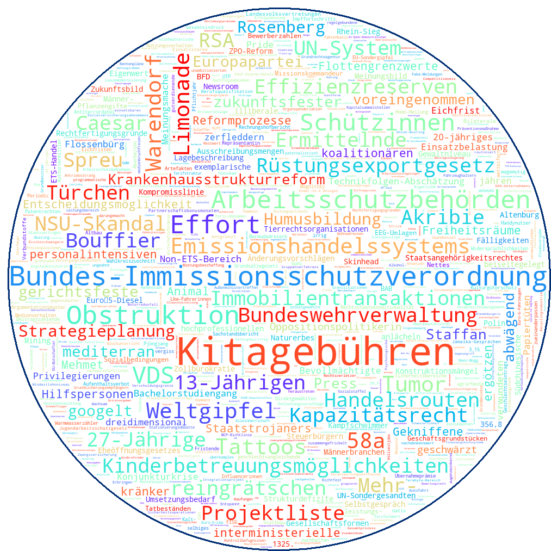

In [135]:
mask = np.array(Image.open("C:/Users/ck12/Documents/Fächer/Semester 7/Polarisierung im Bundestag/circle.png"))
wordcloud = WordCloud(background_color='white', max_words=1000, mask=mask,contour_color='#023075',contour_width=3,colormap='rainbow').generate_from_frequencies(counts)
# create image as circle

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# store to file
plt.savefig("circle", format="png")
plt.show()